# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [128]:
m = 1
A = 0.01#15#0.12476908595279704#0.0100#872627258300784#0.12872631072998048#9#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [129]:
zeroformat=false

false

In [130]:
expp=collect(-30:0.5:-15)
expp[1]

-30.0

Choose your grid

In [131]:
global compactified=true
global loggrid=false

global bisection=false

false

In [132]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*100.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [133]:
print(N)

200.0

In [1]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [135]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [136]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.005
the time step is 0.0025


# Initial data of m β Ψ and Ψ,x

In [137]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)


#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)


state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [138]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [139]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [140]:
y0=Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

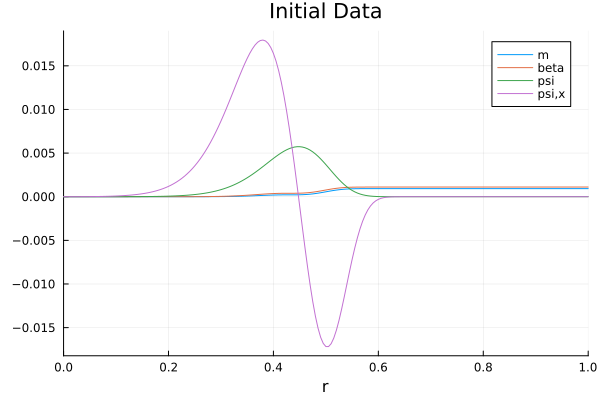

In [141]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "psi,x"],xlim=[0,1])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [142]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [143]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [144]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.020151006287272


In [145]:
using Base.Threads
Threads.nthreads()

4

In [146]:
if m==1
    global dt=2e-5
elseif m==2
    global dt=1e-5
else
    global dt=1e-5/2
end

2.0e-5

 ## Time evolution

In [147]:
twod=false

false

fixed grid

In [148]:
finaltime=3.5
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 1 dt is 0.00505037751571818, t=0.00505037751571818 speed is 0.49501250000010977, dx/dt=0.9900250000002195


iteration 2 dt is 0.00505037751571789, t=0.01010075503143607 speed is 0.4950125000001382, dx/dt=0.9900250000002764


iteration 3 dt is 0.00505037751571754, t=0.01515113254715361 speed is 0.4950125000001725, dx/dt=0.9900250000003451


iteration 4 dt is 0.005050377515717125, t=0.020201510062870735 speed is 0.49501250000021313, dx/dt=0.9900250000004264


iteration 5 dt is 0.005050377515716631, t=0.025251887578587366 speed is 0.49501250000026165, dx/dt=0.9900250000005233


iteration 6 dt is 0.005050377515716045, t=0.03030226509430341 speed is 0.49501250000031904, dx/dt=0.990025000000638


iteration 7 dt is 0.0050503775157153576, t=0.03535264261001877 speed is 0.49501250000038644, dx/dt=0.9900250000007729


iteration 8 dt is 0.00505037751571455, t=0.04040302012573332 speed is 0.49501250000046554, dx/dt=0.9900250000009312


iteration 9 dt is 0.005050377515713607, t=0.045453



iteration 72 dt is 0.005050377508536283, t=0.3636271810459192 speed is 0.495012500704043, dx/dt=0.990025001408086


iteration 73 dt is 0.005050377507952098, t=0.3686775585538713 speed is 0.49501250076130193, dx/dt=0.9900250015226039


iteration 74 dt is 0.00505037750732653, t=0.3737279360611978 speed is 0.495012500822617, dx/dt=0.990025001645234


iteration 75 dt is 0.005050377506657131, t=0.37877831356785496 speed is 0.49501250088822807, dx/dt=0.990025001776456


iteration 76 dt is 0.0050503775059413504, t=0.3838286910737963 speed is 0.4950125009583852, dx/dt=0.9900250019167705


iteration 77 dt is 0.005050377505176531, t=0.3888790685789728 speed is 0.49501250103334904, dx/dt=0.990025002066698


iteration 78 dt is 0.005050377504359892, t=0.3939294460833327 speed is 0.4950125011133918, dx/dt=0.9900250022267836


iteration 79 dt is 0.005050377503488549, t=0.3989798235868212 speed is 0.4950125011987965, dx/dt=0.9900250023975931


iteration 80 dt is 0.005050377502559495, t=0.40403020108



iteration 150 dt is 0.0050503770472766375, t=0.7575566159237944 speed is 0.4950125459143885, dx/dt=0.9900250918287768


iteration 151 dt is 0.005050377033217717, t=0.7626069929570122 speed is 0.4950125472923731, dx/dt=0.9900250945847462


iteration 152 dt is 0.005050377019048956, t=0.7676573699760612 speed is 0.49501254868112377, dx/dt=0.9900250973622475


iteration 153 dt is 0.005050377004786728, t=0.7727077469808479 speed is 0.4950125500790356, dx/dt=0.9900251001580711


iteration 154 dt is 0.0050503769904482725, t=0.7777581239712962 speed is 0.49501255148441886, dx/dt=0.9900251029688378


iteration 155 dt is 0.00505037697605169, t=0.7828085009473479 speed is 0.49501255289549956, dx/dt=0.9900251057909991


iteration 156 dt is 0.005050376961615918, t=0.7878588779089638 speed is 0.4950125543104213, dx/dt=0.9900251086208427


iteration 157 dt is 0.005050376947160733, t=0.7929092548561245 speed is 0.4950125557272458, dx/dt=0.9900251114544917


iteration 158 dt is 0.0050503769327067335,



iteration 219 dt is 0.005050376967104245, t=1.106032612923024 speed is 0.49501255377248304, dx/dt=0.9900251075449661


iteration 220 dt is 0.005050376989017948, t=1.111082989912042 speed is 0.4950125516246121, dx/dt=0.9900251032492242


iteration 221 dt is 0.0050503770112118014, t=1.1161333669232538 speed is 0.4950125494492822, dx/dt=0.9900250988985645


iteration 222 dt is 0.005050377033627762, t=1.1211837439568817 speed is 0.4950125472521826, dx/dt=0.990025094504365


iteration 223 dt is 0.005050377056205639, t=1.1262341210130873 speed is 0.49501254503921266, dx/dt=0.9900250900784253


iteration 224 dt is 0.005050377078883206, t=1.1312844980919705 speed is 0.4950125428164716, dx/dt=0.9900250856329432


iteration 225 dt is 0.005050377101596326, t=1.136334875193567 speed is 0.49501254059024596, dx/dt=0.9900250811804919


iteration 226 dt is 0.005050377124279081, t=1.141385252317846 speed is 0.4950125383669965, dx/dt=0.990025076733993


iteration 227 dt is 0.005050377146863913, t=1.14



iteration 300 dt is 0.005050375466887428, t=1.5151131442286965 speed is 0.4950127008162351, dx/dt=0.9900254016324702


iteration 300 dt is 0.005050375466887428, t=1.5151131442286965 speed is 0.4950127008162351, dx/dt=0.9900254016324702


iteration 301 dt is 0.0050503754131612545, t=1.5201635196418577 speed is 0.49501270608220765, dx/dt=0.9900254121644153


iteration 302 dt is 0.005050375360643253, t=1.525213895002501 speed is 0.49501271122976126, dx/dt=0.9900254224595225


iteration 303 dt is 0.005050375309440932, t=1.5302642703119418 speed is 0.4950127162483585, dx/dt=0.990025432496717


iteration 304 dt is 0.005050375259659296, t=1.5353146455716011 speed is 0.49501272112770744, dx/dt=0.9900254422554149


iteration 305 dt is 0.005050375211400574, t=1.5403650207830017 speed is 0.4950127258577879, dx/dt=0.9900254517155758


iteration 306 dt is 0.005050375164763946, t=1.5454153959477657 speed is 0.4950127304288789, dx/dt=0.9900254608577579


iteration 307 dt is 0.005050375119845285, t=



iteration 374 dt is 0.005050376667290248, t=1.8888409169566165 speed is 0.49501258315874513, dx/dt=0.9900251663174903


iteration 375 dt is 0.005050376714249723, t=1.8938912936708663 speed is 0.49501257855601305, dx/dt=0.990025157112026


iteration 376 dt is 0.005050376760042873, t=1.8989416704309092 speed is 0.49501257406759835, dx/dt=0.9900251481351967


iteration 377 dt is 0.005050376804617173, t=1.9039920472355263 speed is 0.4950125696986493, dx/dt=0.9900251393972986


iteration 378 dt is 0.005050376847924082, t=1.9090424240834503 speed is 0.49501256545392364, dx/dt=0.9900251309078472


iteration 379 dt is 0.005050376889919084, t=1.9140928009733693 speed is 0.4950125613377845, dx/dt=0.990025122675569


iteration 380 dt is 0.0050503769305617245, t=1.919143177903931 speed is 0.4950125573541972, dx/dt=0.9900251147083944


iteration 381 dt is 0.005050376969815621, t=1.9241935548737465 speed is 0.4950125535067276, dx/dt=0.9900251070134554


iteration 382 dt is 0.005050377007648474, t=



iteration 444 dt is 0.0050503772136730905, t=2.2423673275820795 speed is 0.4950125296050459, dx/dt=0.9900250592100919


iteration 445 dt is 0.0050503772065564, t=2.247417704788636 speed is 0.49501253030258807, dx/dt=0.9900250606051763


iteration 446 dt is 0.005050377199780832, t=2.252468081988417 speed is 0.4950125309666951, dx/dt=0.9900250619333903


iteration 447 dt is 0.005050377193357927, t=2.257518459181775 speed is 0.4950125315962359, dx/dt=0.9900250631924719


iteration 448 dt is 0.005050377187297766, t=2.2625688363690726 speed is 0.4950125321902224, dx/dt=0.9900250643804448


iteration 449 dt is 0.005050377181609003, t=2.2676192135506814 speed is 0.49501253274780627, dx/dt=0.9900250654956125


iteration 450 dt is 0.005050377176298907, t=2.2726695907269803 speed is 0.49501253326827516, dx/dt=0.9900250665365503


iteration 451 dt is 0.00505037717137339, t=2.2777199678983537 speed is 0.4950125337510494, dx/dt=0.990025067502099


iteration 452 dt is 0.0050503771668370615, t=2.28



iteration 516 dt is 0.005050377380275789, t=2.6059944876912424 speed is 0.4950125132754893, dx/dt=0.9900250265509787


iteration 517 dt is 0.005050377384921248, t=2.6110448650761637 speed is 0.49501251282016495, dx/dt=0.9900250256403298


iteration 518 dt is 0.005050377389469506, t=2.6160952424656334 speed is 0.49501251237436755, dx/dt=0.9900250247487351


iteration 519 dt is 0.005050377393919158, t=2.6211456198595524 speed is 0.49501251193823514, dx/dt=0.9900250238764703


iteration 520 dt is 0.005050377398269043, t=2.6261959972578213 speed is 0.49501251151188136, dx/dt=0.9900250230237627


iteration 521 dt is 0.005050377402518232, t=2.6312463746603396 speed is 0.4950125110953973, dx/dt=0.9900250221907945


iteration 522 dt is 0.005050377406666019, t=2.6362967520670058 speed is 0.4950125106888521, dx/dt=0.9900250213777042


iteration 523 dt is 0.00505037741071191, t=2.6413471294777175 speed is 0.4950125102922943, dx/dt=0.9900250205845886


iteration 524 dt is 0.005050377414655618, t



iteration 590 dt is 0.005050377512591548, t=2.979722420860779 speed is 0.49501250030656646, dx/dt=0.9900250006131329


iteration 591 dt is 0.005050377512791241, t=2.98477279837357 speed is 0.49501250028699356, dx/dt=0.9900250005739871


iteration 592 dt is 0.005050377512979211, t=2.9898231758865492 speed is 0.4950125002685697, dx/dt=0.9900250005371394


iteration 593 dt is 0.005050377513156075, t=2.9948735533997053 speed is 0.4950125002512344, dx/dt=0.9900250005024688


iteration 594 dt is 0.005050377513322418, t=2.999923930913028 speed is 0.49501250023493026, dx/dt=0.9900250004698605


iteration 595 dt is 0.005050377513478801, t=3.004974308426507 speed is 0.49501250021960236, dx/dt=0.9900250004392048


iteration 596 dt is 0.0050503775136257634, t=3.0100246859401327 speed is 0.4950125002051979, dx/dt=0.9900250004103958


iteration 597 dt is 0.005050377513763811, t=3.0150750634538968 speed is 0.4950125001916672, dx/dt=0.9900250003833343


iteration 598 dt is 0.005050377513893435, t=3.



iteration 661 dt is 0.0050503775157076354, t=3.338299224434274 speed is 0.49501250000114333, dx/dt=0.9900250000022867


iteration 662 dt is 0.005050377515708657, t=3.3433496019499827 speed is 0.49501250000104313, dx/dt=0.9900250000020864


iteration 663 dt is 0.005050377515709595, t=3.3483999794656922 speed is 0.49501250000095126, dx/dt=0.9900250000019025


iteration 664 dt is 0.005050377515710453, t=3.3534503569814027 speed is 0.49501250000086716, dx/dt=0.9900250000017343


iteration 665 dt is 0.005050377515711239, t=3.358500734497114 speed is 0.4950125000007901, dx/dt=0.9900250000015801


iteration 666 dt is 0.0050503775157119575, t=3.363551112012826 speed is 0.49501250000071967, dx/dt=0.9900250000014393


iteration 667 dt is 0.005050377515712614, t=3.3686014895285386 speed is 0.49501250000065533, dx/dt=0.9900250000013107


iteration 668 dt is 0.0050503775157132134, t=3.3736518670442517 speed is 0.49501250000059654, dx/dt=0.9900250000011932


iteration 669 dt is 0.00505037751571376

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [106]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step710.csv" is not a valid file or doesn't exist

In [49]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [50]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

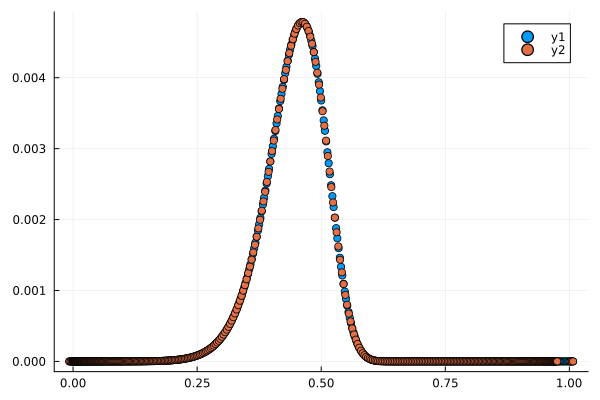

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

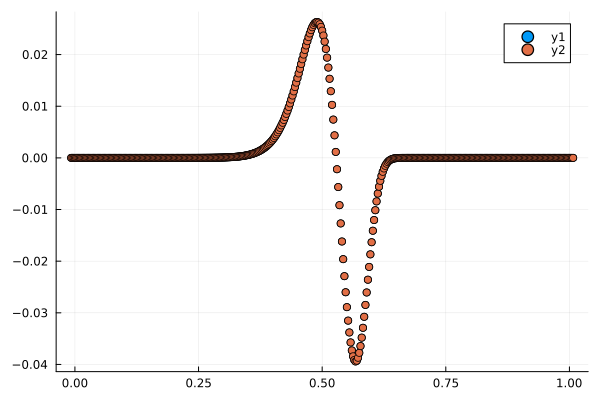

In [417]:
scatter([x1,x1],[y1,y2])